In [ ]:
import torch
import sys; sys.path.append("../utils")
from utils import viz, create_gif_from_folder
import sys; sys.path.append("src")
from run import Vae

In [15]:
# load model
model = Vae(latent_dim=20, image_shape=(3, 128, 128), device="cuda")
model.load_state_dict(torch.load("results/CelebA_linear/weights/best_val/best_val_loss_9_vae.pt"))
model = model.to("cuda")
model.eval()

Vae(
  (encoder): Sequential(
    (0): Linear(in_features=49152, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=128, out_features=40, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=256, out_features=49152, bias=True)
    (5): Sigmoid()
  )
)

# Sampling

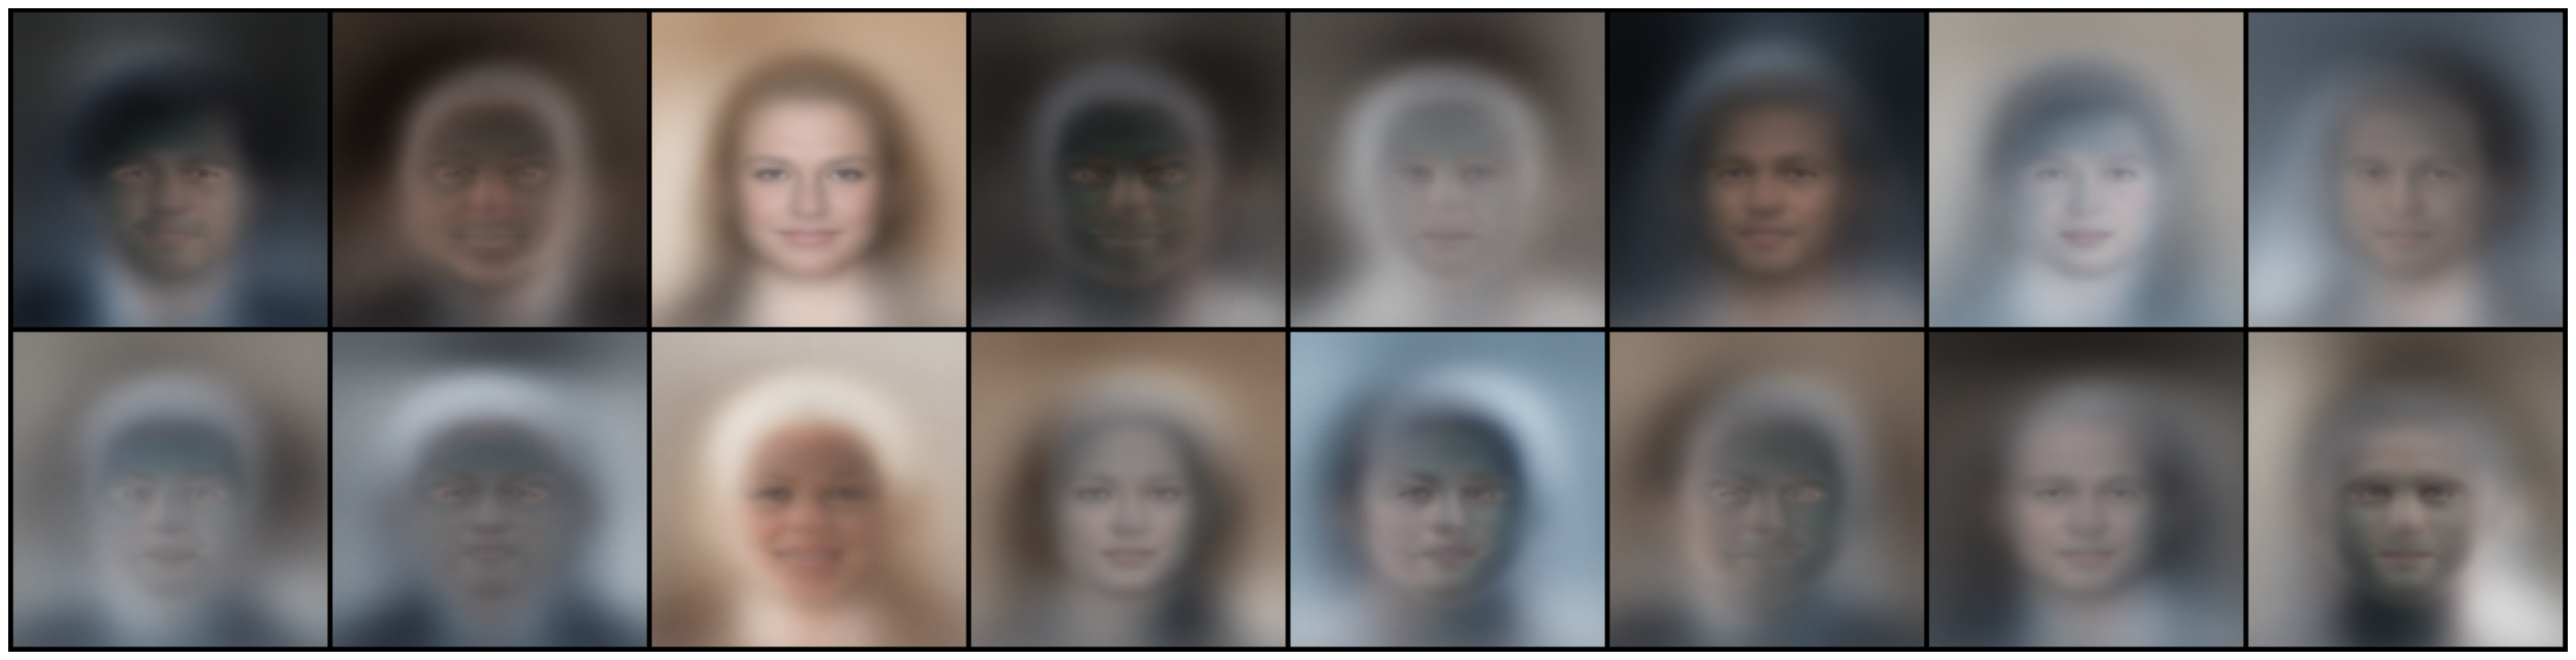

In [16]:
pred = model.sampler(num_samples=16)
viz(pred, f"./results/celeba/tests/pred.png", plot_in_jupyter=True)